### Correlation

-Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.


#### Pearson's Correlation Coefficient

-The goal of this test is to answer the question: do two samples have a linear relationship?

-To answer this question, we will take the following steps:

    1. Calculate the Pearson correlation coefficient
    
$r_{xy}$

    2. Calculate the corresponding t-values

    3. Test whether the t-values are significant or not


In [34]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt
from env import host, user, password
from scipy import stats
from pydataset import data

df = pd.read_csv('exam_scores.csv')
df.head(3)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


#### Pre-Set Values

Before we perform the test, we will choose some values for our confidence interval and, based on that value, our alpha.



In [22]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_level = .95 # desired confidence interval
α = 1 - conf_level

#### Null Hypothesis

-There is no linear correlation between the number of hours studied and the score on the exam.

#### Calculate Pearson Correlation Coefficient

-The correlation coefficient, $r_{xy}$ is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.

-How much of a linear correlation do the two variables have?

-We will calculate the correlation between hours studied and exam score.



In [7]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.8351498542747394

#### Calculate the corresponding p-value

-We can calculate a t-statistic for our correlation coefficient in order to inform us how likely it is that we observed this result due to chance. We will then use this t-statistic to find our p-value.

-The t-value can be positive for positive correlations and negative for negative correlations,
where n−2 is our degrees of freedom. (n-2 because we have 2 variables, x and y)

In [8]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

9.359998378501057

Once we have our t-statistic, we can find our p-value by looking up the t-statistic in a t-table, or by using scipy's t distribution:



In [9]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

2.0762953241921853e-11

Lastly, we compare our p value to our alpha that we selected earlier:



In [10]:
p < α


True

Since p is less than alpha, we reject our null hypothesis that there is no linear correlation between the number of hours studied and exam score.



### The Easy Way!!!!!!!!!!!!!!!!!!!

-All of the work that we did above is also provided by scipy's stats module in it's pearsonr function.




In [11]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.8351498542747394, 2.0762953241921853e-11)

#### Correlation Gotchas

-When working with correlation, keep in mind:

    1. Correlation is not causality.

    2. Correlation measures linear relationship between the 2 variables. However, there may be other types of relationships, such as a quadratic or absolute value relationship.
    
    3. Correlations can be misleading when confounding variables are ignored.

    4. Correlation tells you nothing about how large the relationship is.



#### Correlation is Not Causation

-Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.




### Non-Linear Relationship

-Here we'll look at an example of a non-linear relationship:



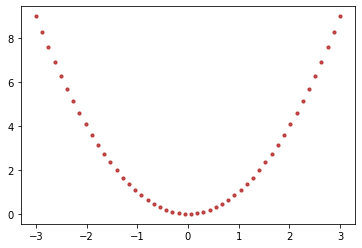

In [12]:
x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=10, c='firebrick', alpha=.8)

We see that there is clearly a direct relationship between x and y, however it is not a linear relationship, so a correlation test will not give us significant results.



In [13]:
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

r = -0.00000
p = 1.0


### Confounding Variables

-We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.

-In our exam score data, if we look at coffee consumption and exam score, we see that they are strongly negatively correlated:



Text(8, 80, 'r = -0.994')

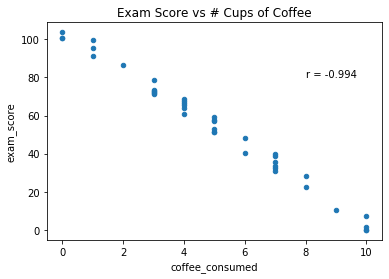

In [14]:
r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)

df.plot.scatter('coffee_consumed', 'exam_score')
plt.title('Exam Score vs # Cups of Coffee')
plt.text(8, 80, f'r = {r:.3f}')

However, it is probably the case that a third variable here has more influence, the number of hours that each student slept before the exam. We know that getting a good night's sleep improves exam scores, and if you don't get a good night's sleep, you are probably likely to drink more coffee.



In [15]:
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}')

Correlation between hours slept and coffee consumed
  r = -1.000
Correlation between hours slept and exam score
  r = 0.994


### Scale of the Relationship

-The correlation coefficient shows us how linearly correlated two variables are, but doesn't tell us the scale. That is one variable could increase/decrease in lock step with another, but the size of the change could be tiny.

-Imagine our data was a little different and we tracked several student's coffee intake before an exam. The coffee consumption could be perfectly correlated with exam score, but to such a small amount that it doesn't matter.

Text(1, 63, 'p = 0.000000e+00')

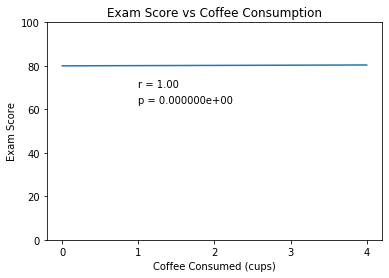

In [33]:
cups_of_coffee = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]
r, p = stats.pearsonr(cups_of_coffee, exam_score)

plt.plot(cups_of_coffee, exam_score)
plt.title('Exam Score vs Coffee Consumption')
plt.ylim(0, 100)
plt.xticks(range(5))
plt.xlabel('Coffee Consumed (cups)')
plt.ylabel('Exam Score')

plt.text(1, 70, f'r = {r:.2f}')
plt.text(1, 63, f'p = {p:e}')

### Examples from class

In [17]:
mpg=data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
corr, p  = stats.pearsonr(mpg.cty, mpg.hwy)
corr, p

(0.9559159136495721, 1.8683071952629614e-125)

Is there a linear relationship between city and hwy mileage?

-$H_0$: There is no linear relationship between city and highway mileage.

-$H_a$: There is a linear relationship between city and highway mileage.

-Based on the results below, I reject the $H_0$.

In [24]:
x = mpg.hwy

y = mpg.cty

r, p = stats.pearsonr(x, y)
print(f"r = {r:.4}")
print(f"p ={p}")

r = 0.9559
p =1.8683071952629614e-125


Is there a linear relationship bewtween engine displacement(displ) and city mileage(cty)?

-$H_0$: There is no linear relationship between engine displacement and city mileage.

-$H_a$: There is a linear relationship between engine displacement and city mileage.

-Based on the results below, I reject the $H_0$.

In [27]:
d = mpg.displ

c = mpg.cty

r, p = stats.pearsonr(d, c)

print(f"r = {r:.4}")
print(f"p ={p}")

r = -0.7985
p =4.737914890205637e-53


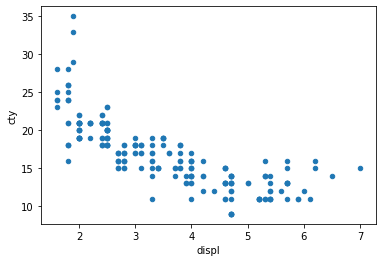

In [32]:
mpg.plot.scatter("displ", "cty")